# Assignment 0

**Name:** Alvaro Alexis Muñoz Reynoso

**e-mail:** alvaro.munoz7503@alumnos.udg.mx

# MODULES

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm

#### Booth Function

- Given the most common functions to test Gradient Descent algorithm, i've selected the Booth Function.

- On next code we will define the booth function and its corresponding gradient returning an array with `x` and `y` derivatives.

In [4]:
# Defining booth function
def booth_function(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# Defining booth function gradient
def booth_gradient(x, y):
    df_dx = 2*(x + 2*y - 7) + 4*(2*x + y - 5)
    df_dy = 4*(x + 2*y - 7) + 2*(2*x + y - 5)
    return np.array([df_dx, df_dy])

#### Gradient Descent Function Algorithm

At a first glance we can observe three parameters that the function receives, here is a brief explanation of each one:

 - **learning rate**: It's the constant that defines how large will be the "steps taken" on each iteration until reaching the local minimun point.
 - **max_iterations**: It's the loop limit in which the algorithm will be repeated to "give a step" on each iteration to get "closer and closer" to the function local minimum point.
 - **tolerance**: It is the convergence criteria used to know when to stop the loop, in other words if the distance "walked" between each "step taken" of the actual and the previous iteration is smaller than the defined tolerance, it will be infered that the minimun function point has been reached.

In each iteration the `x` and `y` values ​​are stored in an array, so that the path taken to find the minimum point of the function can later be plotted. Then when the loop starts, `x` and `y` values are evaluated by the gradient(derivative) of Booth function, after that, the new values "steps" to be taken are calculated with the `gradient descendent algorithm` that is the current x/y values minus the constant designated at the beginning (learning rate) multiplied by the correspondent gradients/derivatives for `x` and `y`.
The difference/distance between the new point and the one at previous iteration is measured with the `Euclidean distance` method, that consists on a square root where current and old values of `x` and `y` are involved.

In [5]:
def gradient_descent(learning_rate=0.01, max_iterations=100, tolerance=1e-6):
    #x, y = np.random.uniform(-10, 10, 2)  # Random initialization
    x, y = (8,8)
    path = [(x, y)]  # To save the path taken

    for _ in range(max_iterations):
        grad = booth_gradient(x, y)
        x_new = x - learning_rate * grad[0]
        y_new = y - learning_rate * grad[1]
        path.append((x_new, y_new))

        # If the difference is smaller than tolerance the loop ends 
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < tolerance:
            break

        x, y = x_new, y_new

    return np.array(path), booth_function(x, y)

# Execute the algorithm
path, final_value = gradient_descent(learning_rate=0.01)

print(f"Minimum value reached: {final_value}")
print(f"Minimun point: {path[-1]}")

Minimum value reached: 0.03517589321144675
Minimun point: [1.13261957 2.86738046]


#### Plot of Booth Function on a 2D plane and a 3D plane.
- The figure limits are defined as a range of numbers of `x axis` and `y axis` and a grid with.
- Configure the figure paramaters and subsequently the plot line to be displayed on it.

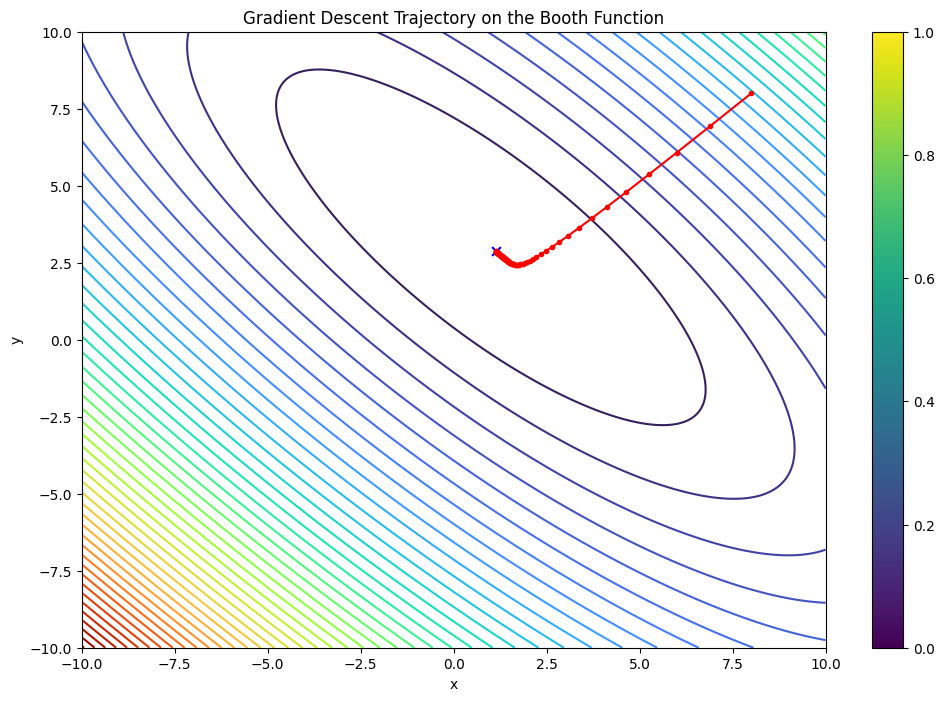

In [71]:
# Plot the function and the trajectory trace (2D)
X = np.linspace(-10, 10, 400)
Y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(X, Y)
Z = booth_function(X, Y)

plt.figure(figsize=(12, 8))
plt.contour(X, Y, Z, levels=50, cmap='turbo')

plt.scatter(path[-1][0], path[-1][1], 40, c='b', marker='x') # Minimum point
plt.plot(path[:, 0], path[:, 1], 'ro-', markersize=3)  # Trajectory

plt.title('Gradient Descent Trajectory on the Booth Function')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()


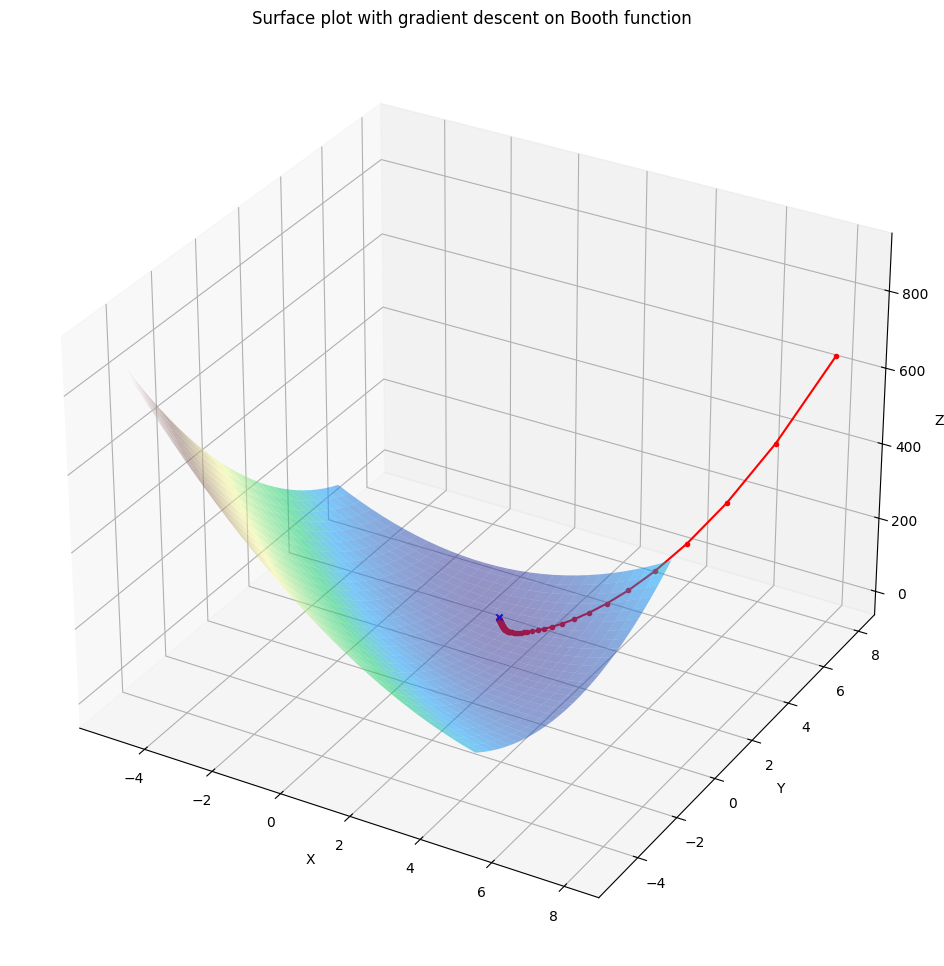

In [60]:
# Plot the function and the trajectory trace (3D)
X = np.linspace(-5, 5, 30)
Y = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(X, Y)
Z = booth_function(X, Y)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='terrain', alpha=0.5) 
ax.scatter(path[-1][0], path[-1][1], 6, c='b', marker='x') # Minimun point

# Draw the pendient
ax.plot(path[:, 0], path[:, 1], booth_function(path[:, 0], path[:, 1]), color='r', marker='o', markersize=3) 

# ax.scatter(,0,200, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Surface plot with gradient descent on Booth function')
plt.show()